<a href="https://colab.research.google.com/github/mthasneem/tensorflow_study/blob/main/beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/

---

notebooks/welcome.ipynb) notebook. Python programs are run directly in the

---

browser—a great way to learn and use TensorFlow. To follow this tutorial, run

---

the notebook in Google Colab by clicking the button at the top of this page.

---



---



1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/images/beginner/run_cell_icon.png?raw=1)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [15]:
import tensorflow as tf
import numpy as np
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.17.0


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [16]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


Flatten: This layer converts the 2-dimensional input image (28x28 pixels) into a 1-dimensional array (784 pixels). Think of it as unstacking a neatly folded shirt - you're just laying out all the pixels in a line. This is necessary because the Dense layer expects a 1D input.

Dense: These layers are the core building blocks of your neural network. Each neuron in a dense layer receives input from all neurons in the previous layer, allowing it to learn complex relationships in the data.

The first Dense layer has 128 neurons and uses the 'relu' activation function, which helps the model learn non-linear patterns.
The second Dense layer has 10 neurons (corresponding to the 10 possible digit classes) and produces the logits (raw predictions) for each class.
Dropout: This layer randomly "drops out" (sets to zero) a fraction of the neurons during training. This prevents the model from relying too heavily on any single neuron and helps improve generalization (performance on unseen data). In your model, the dropout rate is 0.2, meaning 20% of neurons are dropped out randomly during each training step.

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

In [18]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.85066277,  0.36132044,  0.75658697, -0.11134451, -0.7759319 ,
         0.4817332 , -0.05425595, -0.5229096 ,  0.28873724,  0.23612285]],
      dtype=float32)

The `tf.nn.softmax` function converts these logits to *probabilities* for each class:

In [19]:
tf.nn.softmax(predictions).numpy()

array([[0.17978446, 0.11021317, 0.16364229, 0.06870015, 0.03534525,
        0.1243163 , 0.07273626, 0.04552158, 0.10249697, 0.09724356]],
      dtype=float32)

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [20]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [21]:
loss_fn(y_train[:1], predictions).numpy()

2.0849261

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [22]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss:

In [23]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8579 - loss: 0.4807
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9543 - loss: 0.1539
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9660 - loss: 0.1123
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9728 - loss: 0.0874
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9756 - loss: 0.0766
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9793 - loss: 0.0667
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9810 - loss: 0.0598
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9834 - loss: 0.0510
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9840 - loss: 0.0483
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9843 - loss: 0.0465


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [24]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9786 - loss: 0.0746


[0.07458192855119705, 0.978600025177002]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [25]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [26]:
prediction_number = probability_model(x_test[:5])
print(prediction_number)
predicted_class = np.argmax(prediction_number, axis=1)
print("Predicted Class:", predicted_class)

tf.Tensor(
[[9.7781533e-11 2.4511768e-10 1.5244579e-07 2.5503830e-05 9.0544442e-15
  6.9153677e-10 2.7693467e-18 9.9997437e-01 1.7812333e-11 3.2768948e-08]
 [2.5476190e-09 3.4896762e-05 9.9996400e-01 6.2743211e-09 4.0777014e-18
  9.7648024e-07 1.6661518e-09 7.2799206e-17 1.2920363e-07 1.7619065e-16]
 [1.8214915e-09 9.9985826e-01 4.2588272e-06 6.0751199e-07 4.3698838e-06
  9.1616648e-08 4.8626225e-07 1.1937259e-04 1.2444865e-05 1.7784664e-08]
 [9.9967146e-01 5.9035221e-10 9.1561105e-06 6.8912421e-08 2.4711034e-07
  9.3766303e-06 4.5177494e-06 3.0429999e-04 5.0701665e-09 8.0292835e-07]
 [1.5439726e-07 1.2615771e-11 6.4121210e-08 2.7704850e-10 9.9747002e-01
  3.4766059e-09 1.1253418e-07 7.2136362e-07 4.9732144e-08 2.5289401e-03]], shape=(5, 10), dtype=float32)
Predicted Class: [7 2 1 0 4]


## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


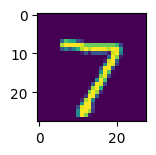

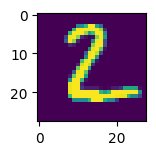

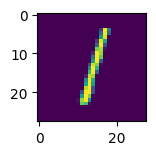

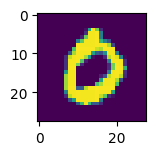

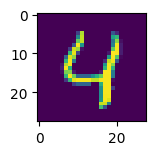

In [27]:
from matplotlib import pyplot
for i in range(5):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(x_test[i])
  pyplot.show()

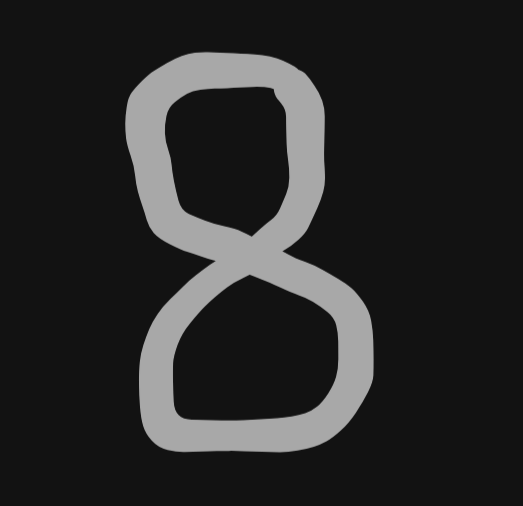

In [28]:
from PIL import Image
import numpy as np
image = Image.open('/content/Screenshot 2024-08-07 123551.png').convert('L') # Convert to grayscale if needed
image

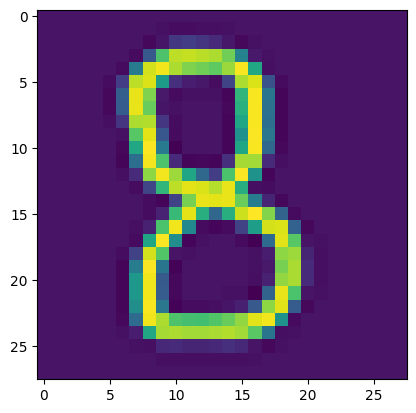

In [29]:
image = image.resize((28, 28))
image_array = np.array(image)
image_array = image_array.reshape(1, 28, 28)  # Add batch dimension
pyplot.imshow(image_array[0])

In [30]:
image_array = image_array / 255.0

In [31]:
prediction = probability_model.predict(image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [32]:
predicted_class = np.argmax(prediction)
print("Predicted Class:", predicted_class)

Predicted Class: 8
